# Regresión

Vamos a trabajar con un dataset sobre precios de casas en boston:

- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per \$10,000
- PTRATIO pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in $1000’s

In [1]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
boston_data = fetch_openml(name='boston', version=1)
df = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)
df['target'] = pd.Series(boston_data.target)
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:
df.drop(['B'],axis=1,inplace=True)

¿ Hay nulos ?

In [12]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
target     0
dtype: int64

Imprimir descripción del dataset:

In [13]:
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,37.970000,50.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   NOX      506 non-null    float64 
 4   RM       506 non-null    float64 
 5   AGE      506 non-null    float64 
 6   DIS      506 non-null    float64 
 7   RAD      506 non-null    category
 8   TAX      506 non-null    float64 
 9   PTRATIO  506 non-null    float64 
 10  LSTAT    506 non-null    float64 
 11  target   506 non-null    float64 
dtypes: category(1), float64(11)
memory usage: 44.5 KB


¿ Hay variables correlacionadas entre sí ?

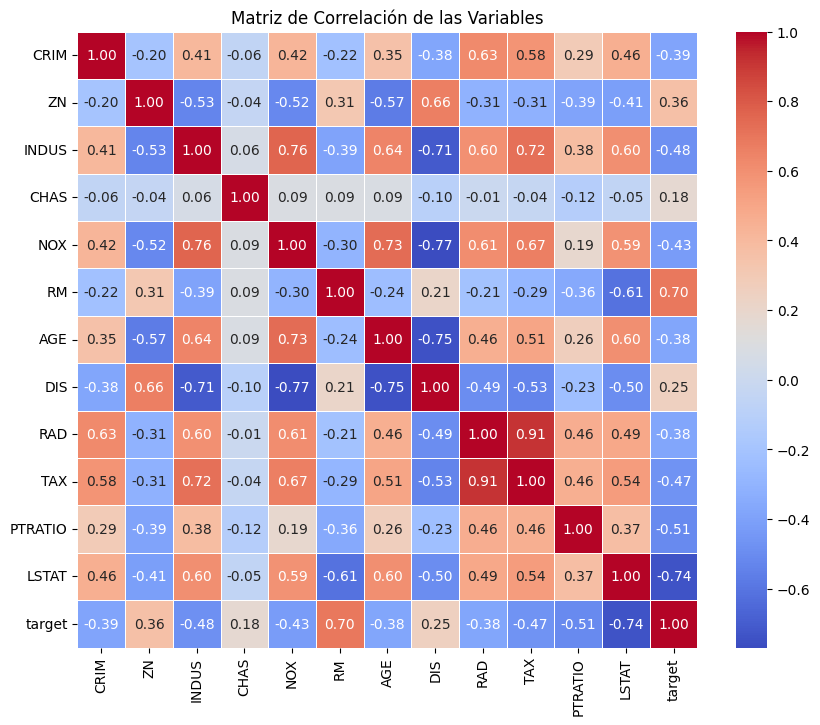

In [14]:
import matplotlib.pyplot as plt

# Supongamos que tienes un DataFrame llamado df
# df = pd.read_csv('ruta_a_tu_archivo.csv')

# 1. Calcular la matriz de correlación
corr_matrix = df.corr()

# 2. Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))  # Ajusta el tamaño de la figura según sea necesario
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación de las Variables')
plt.show()


En OLS no es bueno poner variables que esten correlacionadas entre sí.

Por lo tanto, descartemos las variables que tienen una alta correlación (más de 0.9) y nos quedemos con 1 sola de ellas:

In [17]:
df = df.drop(columns=['CHAS'])

¿ Cómo se distribuye nuestro target ?

<Axes: xlabel='target', ylabel='Count'>

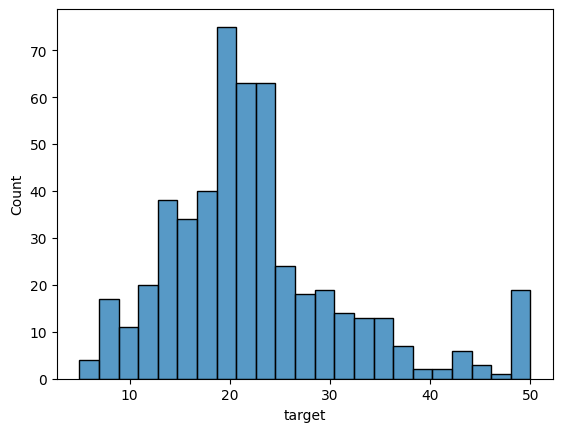

In [18]:
sns.histplot(data=df, x="target")

# Train - Test split

Ahora, vamos a comenzar entrenando un modelo de regresión lineal de sklearn. Primero que nada, separemos en train - test.

Dejemos un 20% de los datos reservados para test y un random_state=42 para obtener todos los mismos resultados:

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
X = df.drop(columns=['target'])
y = df['target']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
X_train_1= X_train[["LSTAT"]].copy()
X_test_1= X_test[["LSTAT"]].copy()

In [49]:
X_train_1= X_train[["DIS"]].copy()
X_test_1= X_test[["DIS"]].copy()

In [35]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 11), (102, 11), (404,), (102,))

# Linear regression

Comenzaremos implementando una regresión lineal simple, utilizando Sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

En principio seleccionemos 1 sola variable como feature (puede ser por ejemplo, la que tenía la correlación más fuerte con el target)

In [50]:
model = LinearRegression()
reg=model.fit(X_train_1, y_train)

Importamos LinearRegression

In [ ]:
# COMPLETAR

Entrenamos el modelo:

In [ ]:
# COMPLETAR

Y validamos su score en train y en test (si se fijan en la documentación, el LinearRegression ya trae un método para calcular el score)

In [51]:
y_pred = model.predict(X_test_1)

In [52]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
scoretrain=reg.score(X_train_1,y_train)
score= reg.score(X_test_1,y_test)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")
print(f"Score1: {scoretrain}")
print(f"Score2: {score}")

Mean Squared Error: 67.95691932803948
R^2 Score: 0.07332042069244582
Score1: 0.05527855223549549
Score2: 0.07332042069244582


Al trabajar con una única feature, podemos graficar.

Graficar un scatterplot que contenga:
- Puntos para los datos de entrenamiento (X_test, y_test)
- Puntos para los datos de test en otro color (Usar hue)
- Una linea con la regresión (predicciones que genera nuestro modelo) en train
- Misma linea pero para test

Para esto, van a necesitar guardar las predicciones (su "y_test_pred" y "y_train_pred") en 2 listas:

In [ ]:
# COMPLETAR

Ahora, agreguemos una feature más al modelo y hagamos lo mismo:

In [ ]:
# COMPLETAR

Vemos que ya empieza a haber una diferencia significativa en los scores entre train y test. Por último, agreguemos todas las features y midamos los R squared:

In [ ]:
# COMPLETAR

Vemos que nuestro modelo se ajusta bastante mejor a los datos de train que de test.

Si vemos en la documentación, hay 2 atributos que nos pueden interesar:

- coef_
- intercept_

¿ Qué significan cada uno ?

Imprimirlos

In [ ]:
# COMPLETAR

Medir el mean squared error (Sklearn tiene la implementacion)

In [ ]:
# COMPLETAR

# Árboles de decision

Ahora, vamos a tratar de hacer lo mismo pero utilizando árboles de decision.

Vimos que sklearn tiene una implementación para esto: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

Importar el decision tree regressor:

In [ ]:
# COMPLETAR

Vamos a hacer lo mismo que la clase pasada: Armar un listado de max_depths, entrenarlo y generar predicciones para cada elemento de la lista y decidir cuál es el mejor valor para max_depth.

En este caso, en lugar de medir el fscore, mediremos el MSE (mean squared error) para comparar con los resultados obtenidos en la regresión lineal

In [ ]:
# COMPLETAR

Vemos como el error va disminuyendo a medida que aumenta el max depth, pero a partir de la profundidad 5, se separan ambas lineas (comienza a overfittear) por lo que avanzaremos con un max_depth=5.

Entrenar el árbol con max_depth=5 y medir el mean_squared_error:

In [ ]:
# COMPLETAR

Vemos como podemos obtener mucho mejores resultados con un simple árbol de decisión.

# KNN

Ahora, probemos KNN.

Vimos que KNN se puede utilizar para regresión y lo que hace es tomar una media ponderada de los vecinos más cercanos.

Importemos knn regressor de sklearn:

In [ ]:
# COMPLETAR

Recuerden que en KNN, es importante escalar los datos. Por lo tanto, vamos a escalar X_train y X_test con un standard scaler.

Escalar los datos:

In [ ]:
# COMPLETAR

Ahora, vamos a entrenar el modelo con distintos valores de K, al igual que hicimos con la profundidad de los arboles.

Entrenar knn con k desde 1 hasta 20 y decidir cuál es el mejor valor:

In [ ]:
# COMPLETAR

Observando el gráfico, decidir el mejor valor de K y volver a entrenar knn.

Luego, medir el MSE y comparar con los modelos anteriores:

In [ ]:
# COMPLETAR

¿ Conclusiones ?